# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [ ]:
# YOUR CODE HERE
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1200,
                  n_features=8,
                  centers=7,
                  cluster_std=8,
                  random_state=1)

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

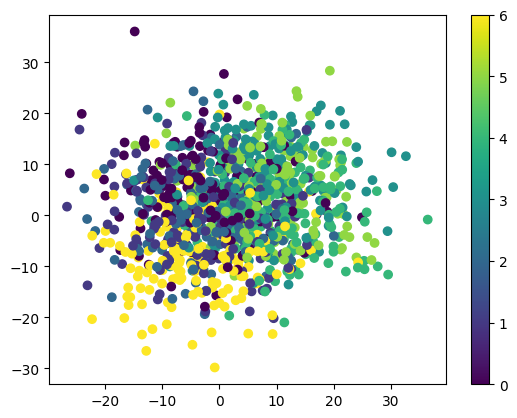

In [2]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis'); plt.colorbar(); plt.show()

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

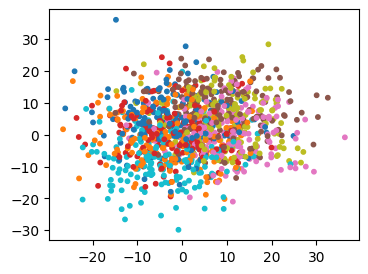

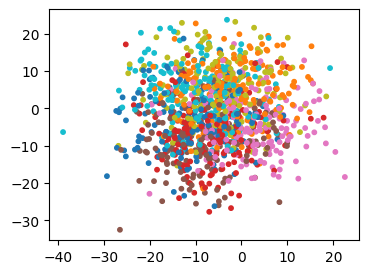

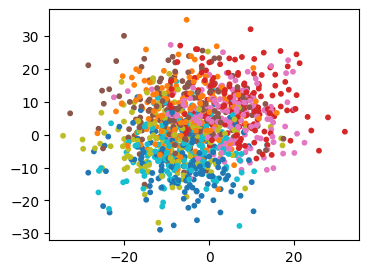

In [6]:
# YOUR CODE HERE
for (i,j) in [(0,1),(2,3),(4,5)]:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,i], X[:,j], c=y, cmap='tab10', s=10)
    plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [8]:
# YOUR CODE HERE
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

y_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_cat,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [12]:
X_test.shape

(360, 8)

In [14]:
X_train.shape

(840, 8)

In [15]:
y_test.shape

(360, 7)

In [13]:
y_train.shape

(840, 7)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [17]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.mean().round(2), X_train_scaled.std().round(2))
print(X_test_scaled.mean().round(2), X_test_scaled.std().round(2))

-0.0 1.0
0.01 0.99


❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    model = Sequential()
    model.add(Dense(50, activation='relu', input_dim=8))
    model.add(Dense(7, activation='softmax'))


    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = initialize_model()

2025-04-11 21:40:44.392640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [19]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [ ]:
# YOUR CODE HERE
history = model.fit(X_train_scaled, y_train,
                   validation_data=(X_test_scaled, y_test),
                   epochs=50,
                   batch_size=32,
                   verbose=1)

Epoch 1/50
27/27 [==============================] - 1s 10ms/step - loss: 1.7949 - accuracy: 0.2952 - val_loss: 1.7167 - val_accuracy: 0.3583
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 1.5712 - accuracy: 0.4762 - val_loss: 1.5424 - val_accuracy: 0.4639
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 1.3961 - accuracy: 0.5905 - val_loss: 1.4053 - val_accuracy: 0.5444
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2572 - accuracy: 0.6381 - val_loss: 1.2950 - val_accuracy: 0.5750
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1470 - accuracy: 0.6607 - val_loss: 1.2055 - val_accuracy: 0.6028
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 1.0595 - accuracy: 0.6810 - val_loss: 1.1385 - val_accuracy: 0.6083
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.9918 - accuracy: 0.6988 - val_loss: 1.0860 - val_accuracy: 0.6139
Epoch 8/50
27/27 [=

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [21]:
# YOUR CODE HERE
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

In [22]:
test_accuracy

0.6527777910232544

In [23]:
test_loss

0.9298555850982666

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

(No need to code for this, just think about how our dataset was created in the first place.)

In [29]:
accuracy_baseline = 1/7

🧪 **Test your code**

In [30]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/alanoud/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/alanoud/code/Alanoudniaf/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-multiclass-classification/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)


❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [ ]:
# YOUR CODE HERE
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=1000,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/1000
27/27 [==============================] - 1s 8ms/step - loss: 1.9428 - accuracy: 0.2000 - val_loss: 1.8314 - val_accuracy: 0.2472
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.7038 - accuracy: 0.3762 - val_loss: 1.6411 - val_accuracy: 0.3972
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.5150 - accuracy: 0.5369 - val_loss: 1.4851 - val_accuracy: 0.4972
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.3607 - accuracy: 0.6119 - val_loss: 1.3588 - val_accuracy: 0.5667
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.2329 - accuracy: 0.6405 - val_loss: 1.2566 - val_accuracy: 0.5889
Epoch 6/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.1291 - accuracy: 0.6667 - val_loss: 1.1766 - val_accuracy: 0.6000
Epoch 7/1000
27/27 [==============================] - 0s 4ms/step - loss: 1.0469 - accuracy: 0.6833 - val_loss: 1.1126 - val_accuracy: 0.6111
Epoch 

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE



overfitting 

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

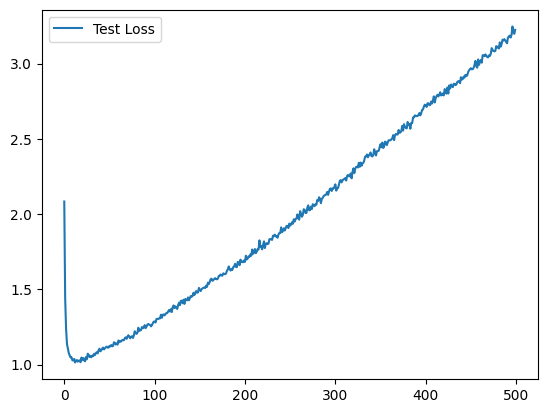

In [34]:
def plot_history(h):
    plt.plot(h.history['val_loss'], label='Test Loss')
    plt.legend(); plt.show()

plot_history(history)

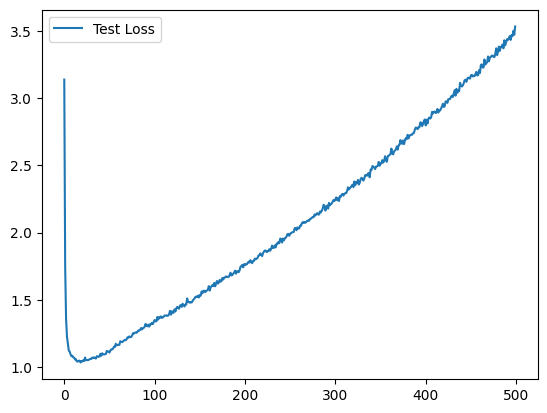

In [ ]:
model = initialize_model()

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500,
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [ ]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

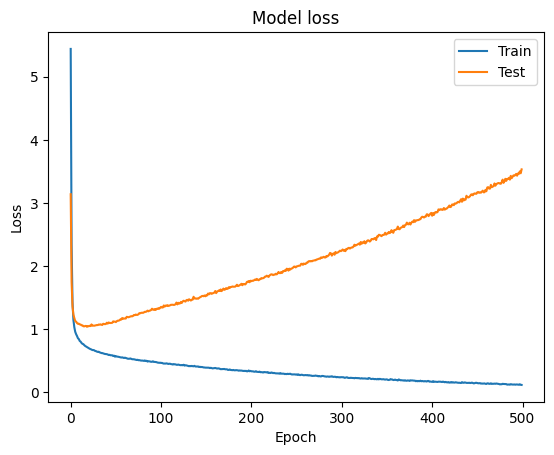

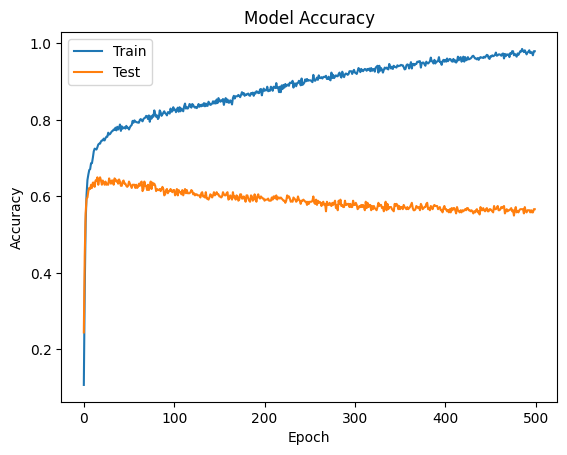

0.24880951642990112 0.21944443881511688
2.319010019302368 2.5451486110687256


In [37]:
# YOUR CODE HERE
plot_loss_accuracy(history)

train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(train_acc , test_acc)
print(train_loss  , test_loss)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!